In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('WHO.csv')

In [5]:
data

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2
5,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900,91.1,84.5
6,Argentina,Americas,41087,24.42,14.97,2.20,76,14.2,134.92,97.8,17130,0.0,0.0
7,Armenia,Europe,2969,20.34,14.06,1.74,71,16.4,103.57,99.6,6100,0.0,0.0
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,0.0,38110,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,0.0,42050,0.0,0.0


In [15]:
data[(data == 0)|(data == 0.0)|(data==0.00)].count()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                     0
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

In [9]:
data.columns

Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')

In [10]:
data.groupby('Region').mean()['FertilityRate']

Region
Africa                   4.724565
Americas                 2.210571
Eastern Mediterranean    3.245000
Europe                   1.661509
South-East Asia          2.560909
Western Pacific          2.067407
Name: FertilityRate, dtype: float64

In [1]:
data['Region'].unique()

NameError: name 'data' is not defined

In [12]:
for i in data['Region'].unique():
    li = list(data[(data['FertilityRate'] == 0.0) & (data['Region'] == i)]['FertilityRate'].index)
    data['FertilityRate'][li] = data['FertilityRate'][data['Region'] == i].mean()

C:\Users\nain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
list(data[(data['FertilityRate'] == 0.0) & (data['Region'] == 'Europe')]['FertilityRate'].index)

[]

In [10]:
data.shape

(194, 13)

In [16]:
from scipy import stats
import numpy as np
data['Population'][np.abs(stats.zscore(data['Population'])) > 3].count()

2

In [17]:
import matplotlib.pyplot as plt

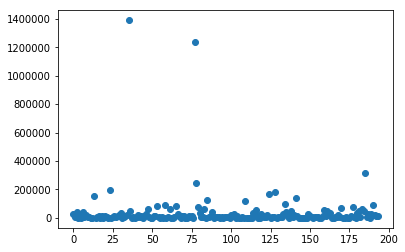

In [18]:
plt.scatter(data['Population'].index, data['Population'])

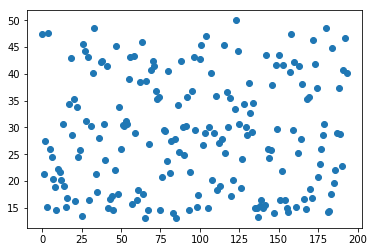

In [14]:
plt.scatter(data['Under15'].index, data['Under15'])

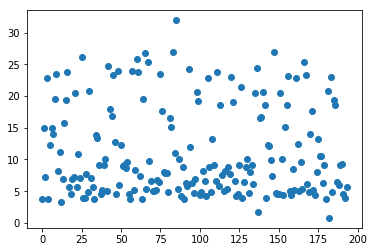

In [15]:
plt.scatter(data['Over60'].index, data['Over60'])

In [19]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [20]:
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,0,2,29825,47.42,3.82,5.400000,60,98.5,54.26,0.0,1140,0.0,0.0
1,1,3,3162,21.33,14.93,1.750000,74,16.7,96.39,0.0,8820,0.0,0.0
2,2,0,38482,27.42,7.17,2.830000,73,20.0,98.99,0.0,8310,98.2,96.4
3,3,3,78,15.20,22.86,1.661509,82,3.2,75.49,0.0,0,78.4,79.4
4,4,0,20821,47.58,3.84,6.100000,51,163.5,48.38,70.1,5230,93.1,78.2


In [21]:
X = data.drop(['LifeExpectancy'], axis=1)

In [22]:
y = data['LifeExpectancy']

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])],5 
              index=X.columns)

C:\Users\nain\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                            129.160722
Country                            1.087892
Region                             1.619467
Population                         1.053921
Under15                           17.336552
Over60                             4.032194
FertilityRate                     12.424086
ChildMortality                     4.822972
CellularSubscribers                1.741336
LiteracyRate                       1.104414
GNI                                1.835431
PrimarySchoolEnrollmentMale      261.402251
PrimarySchoolEnrollmentFemale    264.741236
dtype: float64

In [21]:
data.values.shape

(194, 13)

In [25]:
stats.f_oneway(X['Region'],y)

F_onewayResult(statistic=10082.885411564352, pvalue=9.706078097650169e-279)

In [26]:
columns = list(X.columns)
columns.remove('Region')
columns

['const',
 'Country',
 'Population',
 'Under15',
 'Over60',
 'FertilityRate',
 'ChildMortality',
 'CellularSubscribers',
 'LiteracyRate',
 'GNI',
 'PrimarySchoolEnrollmentMale',
 'PrimarySchoolEnrollmentFemale']

In [27]:
correlation = pd.Series([np.corrcoef(X[i],y)[0,1] 
                         for i in columns], index=columns)
correlation

C:\Users\nain\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\nain\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


const                                 NaN
Country                         -0.026372
Population                       0.016277
Under15                         -0.836467
Over60                           0.688129
FertilityRate                   -0.831073
ChildMortality                  -0.924564
CellularSubscribers              0.532386
LiteracyRate                    -0.072008
GNI                              0.554708
PrimarySchoolEnrollmentMale      0.210041
PrimarySchoolEnrollmentFemale    0.235187
dtype: float64